In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
current_directory = os.getcwd()
print(f"Current working directory: {current_directory}")

Current working directory: C:\Users\Hillbert\EDA_ProblemSets\DataPresentation


In [2]:
xlsx1 = current_directory + './data/cleaned/Country_CPI.xlsx'
xlsx2 = current_directory + './data/cleaned/Area_CPI.xlsx'
xlsx3 = current_directory + './data/cleaned/Gross_National_Income.xlsx'

In [3]:
df_countries = pd.read_excel(xlsx1)
df_areas = pd.read_excel(xlsx2)
df_gni = pd.read_excel(xlsx3)

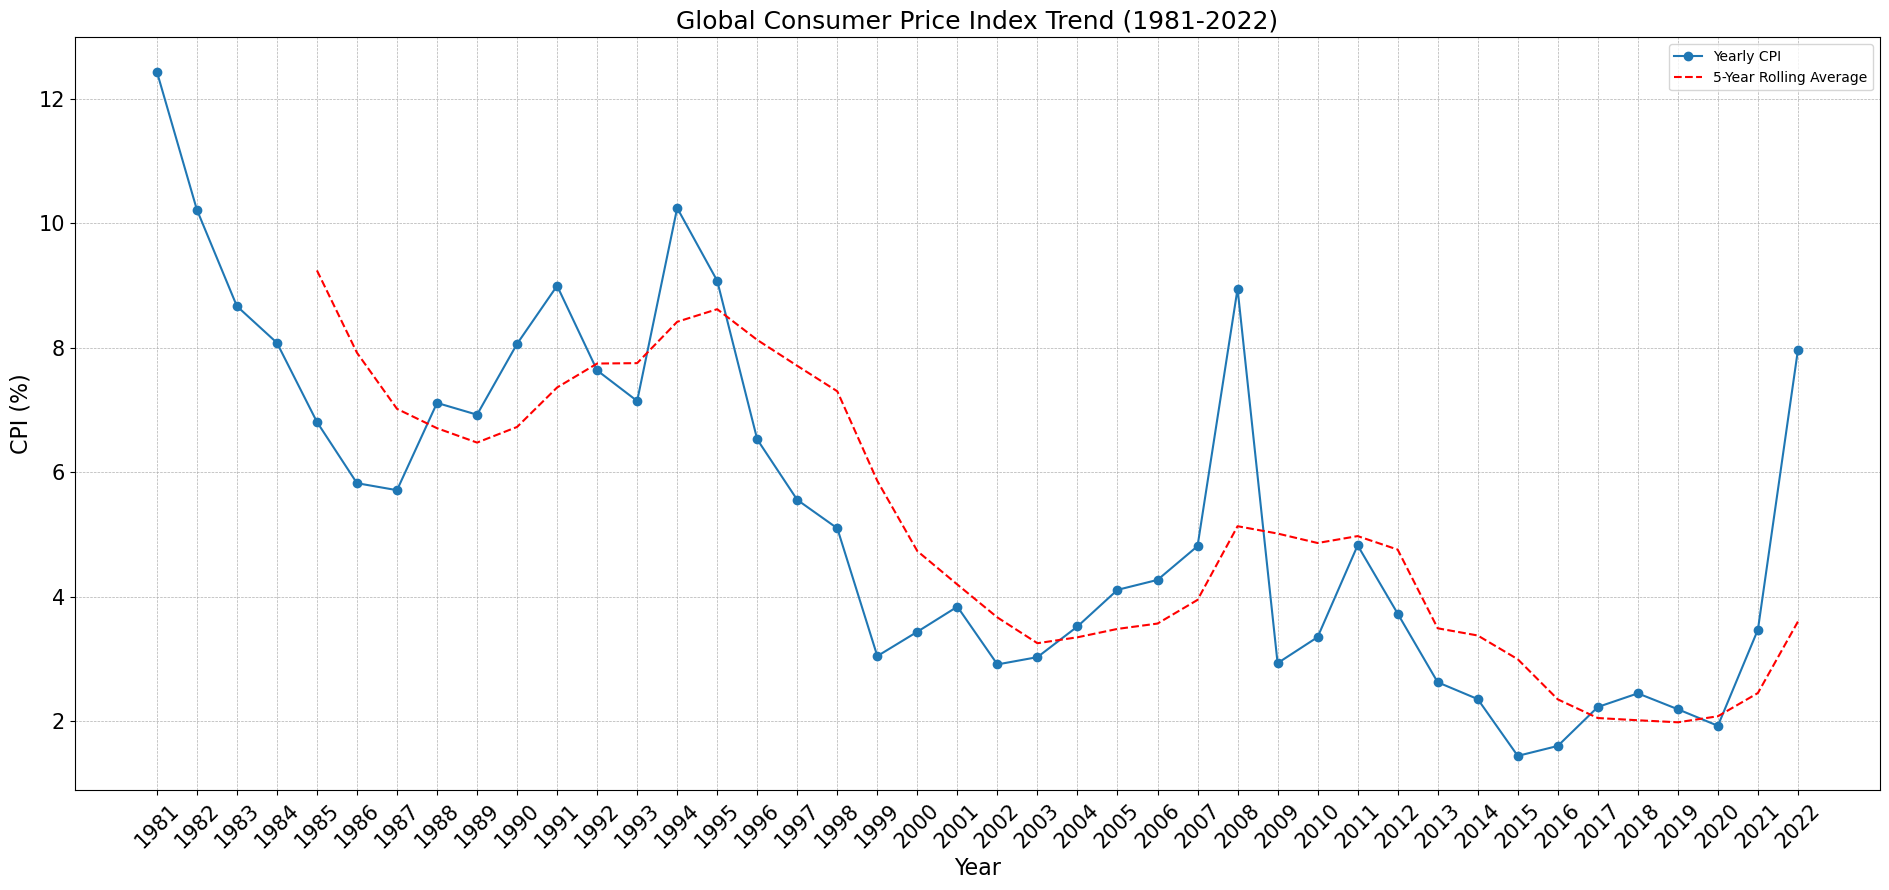

In [4]:
# Extracting the 'World' CPI data and renaming the column for clarity
world_cpi = df_areas[df_areas["Area Name"] == "World"].iloc[:, df_areas.columns.get_loc("1981"):].transpose()
world_cpi.columns = ["CPI"]

# Calculating the rolling 5-year average
world_cpi["5-Year Rolling Avg"] = world_cpi["CPI"].rolling(window=5).mean()

# Plotting
plt.figure(figsize=(19, 9))
plt.plot(world_cpi["CPI"], label="Yearly CPI", marker='o')
plt.plot(world_cpi["5-Year Rolling Avg"], label="5-Year Rolling Average", linestyle='--', color='red')
plt.title("Global Consumer Price Index Trend (1981-2022)", fontsize=18)
plt.xlabel("Year", fontsize=16)
plt.ylabel("CPI (%)", fontsize=16)
plt.legend()
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()

plt.show()

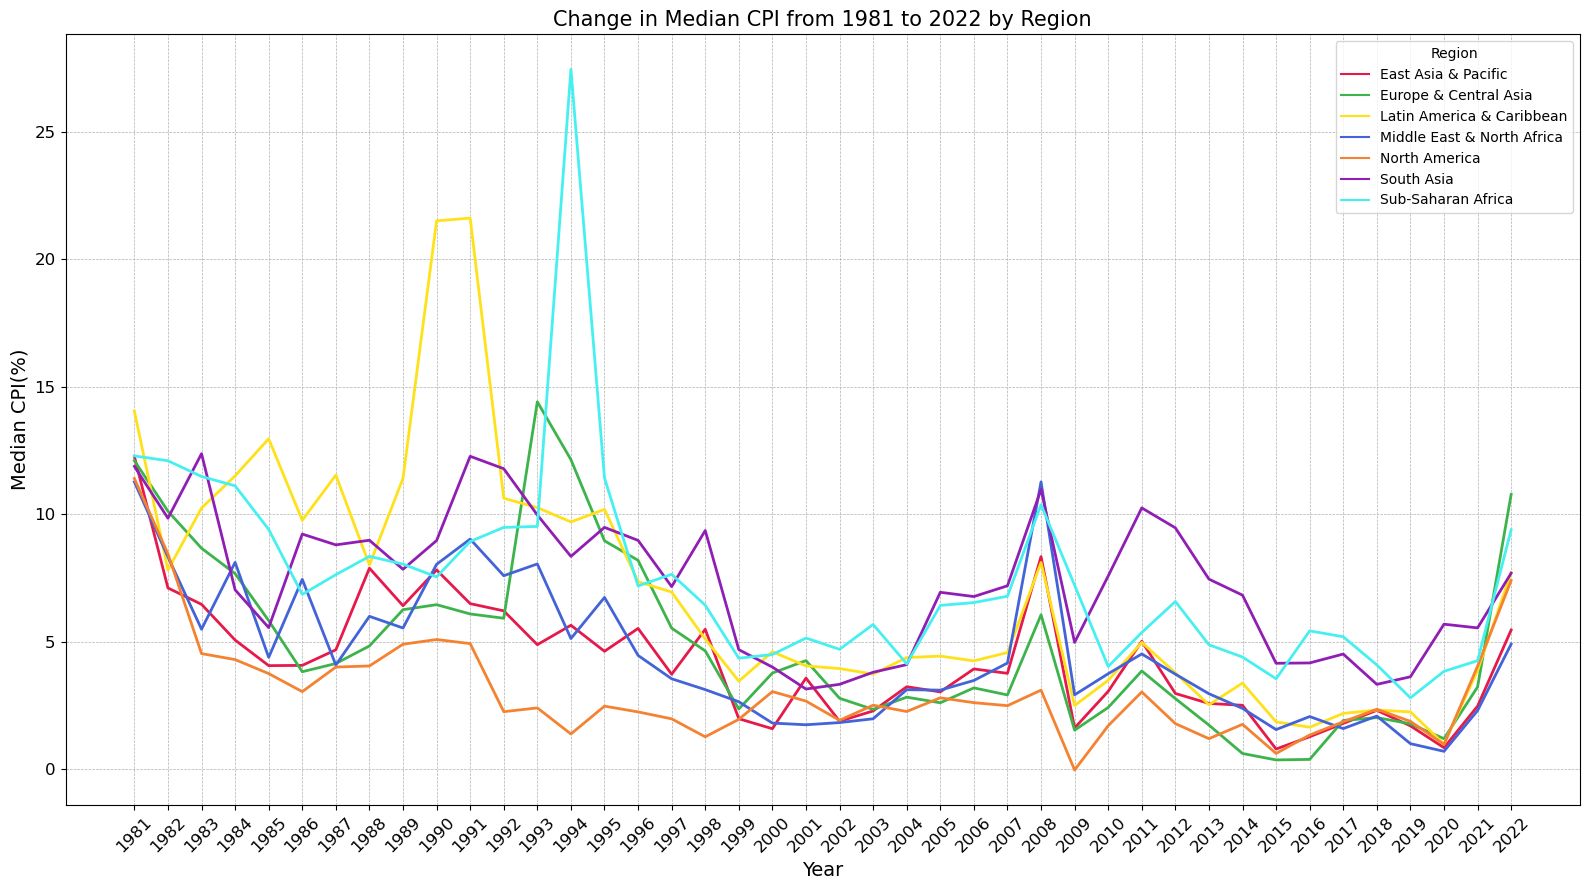

In [5]:
regions = [
    'East Asia & Pacific', 'Europe & Central Asia', 'Latin America & Caribbean',
    'Middle East & North Africa', 'North America', 'South Asia', 'Sub-Saharan Africa'
]

# Filter the dataset to only include the desired regions
df_countries_region_filtered = df_countries[df_countries['Region'].isin(regions)]

# Drop non-numeric columns
df_countries_region_filtered_numeric = df_countries_region_filtered.drop(columns=['Country Code', 'Country Name', 'Region', 'IncomeGroup'])

# Convert all columns to numeric, forcing errors to be NaN (this will handle columns that are mixed types)
df_countries_region_filtered_numeric = df_countries_region_filtered_numeric.apply(pd.to_numeric, errors='coerce')

# Group by the 'Region' column of the original dataframe and compute the median
filtered_regions_cpi_corrected = df_countries_region_filtered.groupby('Region').apply(lambda group: df_countries_region_filtered_numeric.loc[group.index].median()).loc[:, '1981':'2022'].transpose()

# Setting unique colors for each region
colors = {
    'East Asia & Pacific': '#e6194B',
    'Europe & Central Asia': '#3cb44b',
    'Latin America & Caribbean': '#ffe119',
    'Middle East & North Africa': '#4363d8',
    'North America': '#f58231',
    'South Asia': '#911eb4',
    'Sub-Saharan Africa': '#46f0f0'
}

# Plotting the data with distinct colors
plt.figure(figsize=(16, 9))
sns.lineplot(data=filtered_regions_cpi_corrected, palette=colors, dashes=False, linewidth=2)
plt.title("Change in Median CPI from 1981 to 2022 by Region", fontsize=15)
plt.ylabel("Median CPI(%)", fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.legend(title="Region", fontsize=10)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

In [6]:
# Grouping by 'Region' and 'IncomeGroup' to get the count of countries in each combination
income_group_by_region = df_countries.groupby(['Region', 'IncomeGroup']).size().reset_index(name='Count')

# Calculating the total number of countries in each region
region_totals = df_countries['Region'].value_counts().reset_index()
region_totals.columns = ['Region', 'Total']

# Merging the two dataframes to calculate the portion for each income group in a region
merged_df = pd.merge(income_group_by_region, region_totals, on='Region')
merged_df['Portion (%)'] = (merged_df['Count'] / merged_df['Total']) * 100

merged_df.pivot_table(index='Region', columns='IncomeGroup', values=['Count', 'Portion (%)'], aggfunc='first').fillna(0)

Count                                 \
IncomeGroup                High income Low income Lower middle income   
Region                                                                  
East Asia & Pacific               14.0        1.0                13.0   
Europe & Central Asia             38.0        0.0                 4.0   
Latin America & Caribbean         18.0        0.0                 4.0   
Middle East & North Africa         8.0        2.0                 8.0   
North America                      3.0        0.0                 0.0   
South Asia                         0.0        1.0                 6.0   
Sub-Saharan Africa                 1.0       22.0                19.0   

                                               Portion (%)             \
IncomeGroup                Upper middle income High income Low income   
Region                                                                  
East Asia & Pacific                        9.0   37.837838   2.702703   
Europe & Central Asia                     16.0   65.517241   0.000000   
Latin America & Caribbean                 19.0   42.857143   0.000000   
Middle East & North Africa                 3.0   38.095238   9.523810   
North America                              0.0  100.000000   0.000000   
South Asia                                 1.0    0.000000  12.500000   
Sub-Saharan Africa                         6.0    2.083333  45.833333   

                                                                    
IncomeGroup                Lower middle income Upper middle income  
Region                                                              
East Asia & Pacific                  35.135135           24.324324  
Europe & Central Asia                 6.896552           27.586207  
Latin America & Caribbean             9.523810           45.238095  
Middle East & North Africa           38.095238           14.285714  
North America                         0.000000            0.000000  
South Asia                           75.000000           12.500000  
Sub-Saharan Africa                   39.583333           12.500000

In [7]:
# Rearranging the table based on the specified order of income groups
income_order = ['High income', 'Upper middle income', 'Lower middle income', 'Low income']
rearranged_table = merged_df.pivot_table(index='Region', columns='IncomeGroup', values=['Count', 'Portion (%)'], 
                                         aggfunc='first')[['Count', 'Portion (%)']].reorder_levels([1,0], axis=1)[income_order]

rearranged_table.fillna(0)

IncomeGroup                High income             Upper middle income  \
                                 Count Portion (%)               Count   
Region                                                                   
East Asia & Pacific               14.0   37.837838                 9.0   
Europe & Central Asia             38.0   65.517241                16.0   
Latin America & Caribbean         18.0   42.857143                19.0   
Middle East & North Africa         8.0   38.095238                 3.0   
North America                      3.0  100.000000                 0.0   
South Asia                         0.0    0.000000                 1.0   
Sub-Saharan Africa                 1.0    2.083333                 6.0   

IncomeGroup                            Lower middle income              \
                           Portion (%)               Count Portion (%)   
Region                                                                   
East Asia & Pacific          24.324324                13.0   35.135135   
Europe & Central Asia        27.586207                 4.0    6.896552   
Latin America & Caribbean    45.238095                 4.0    9.523810   
Middle East & North Africa   14.285714                 8.0   38.095238   
North America                 0.000000                 0.0    0.000000   
South Asia                   12.500000                 6.0   75.000000   
Sub-Saharan Africa           12.500000                19.0   39.583333   

IncomeGroup                Low income              
                                Count Portion (%)  
Region                                             
East Asia & Pacific               1.0    2.702703  
Europe & Central Asia             0.0    0.000000  
Latin America & Caribbean         0.0    0.000000  
Middle East & North Africa        2.0    9.523810  
North America                     0.0    0.000000  
South Asia                        1.0   12.500000  
Sub-Saharan Africa               22.0   45.833333

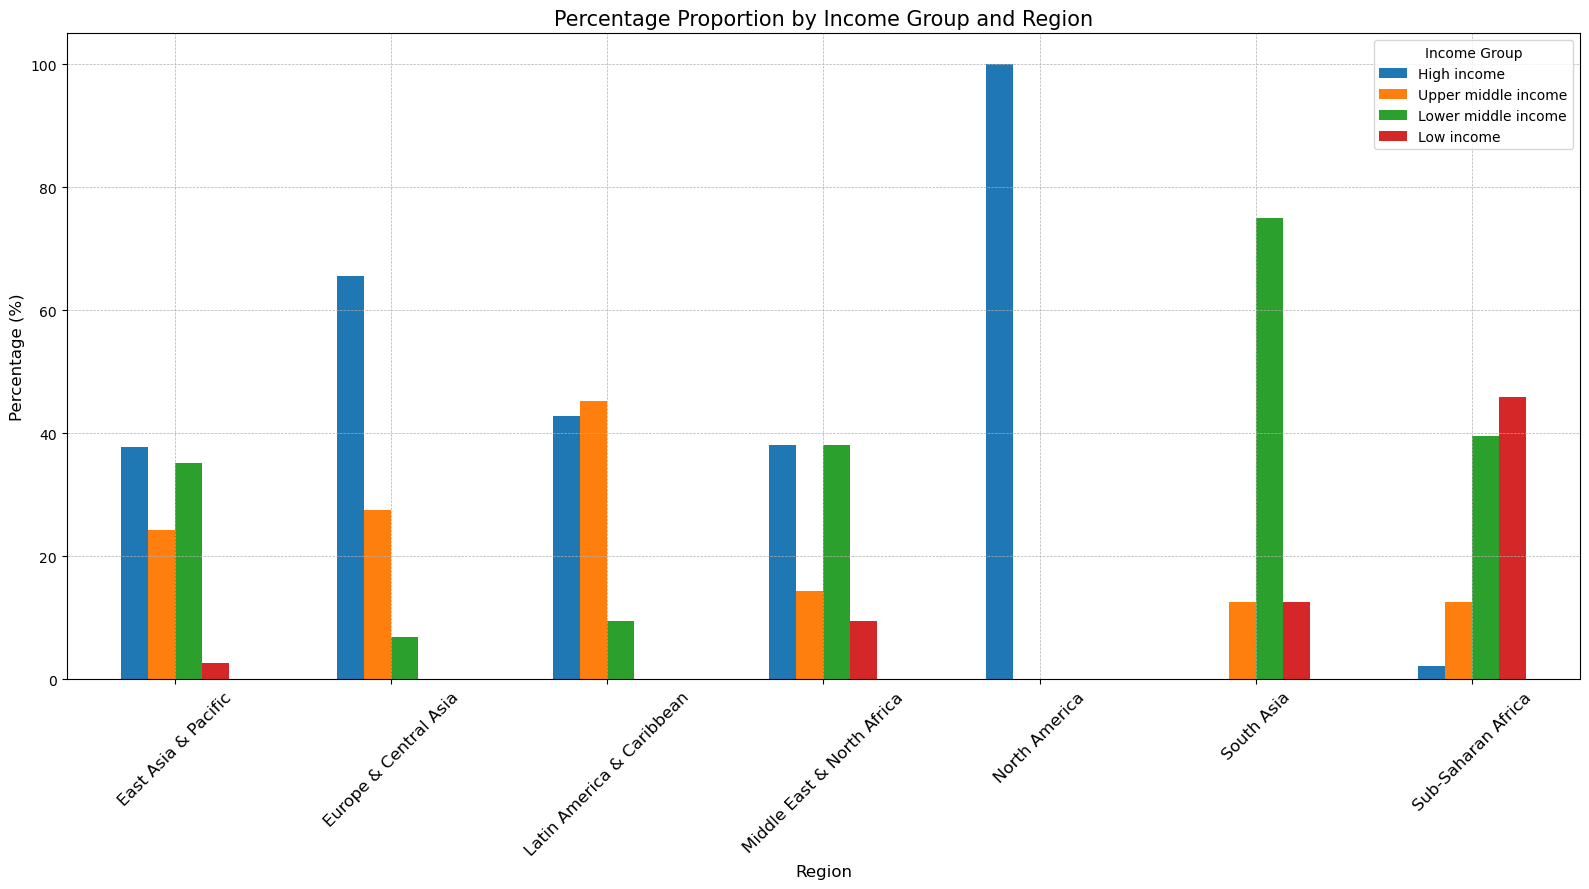

In [8]:
# Extracting portion data from the rearranged_table
portion_data = rearranged_table.xs('Portion (%)', axis=1, level=1)

income_colors = {
    'High income': '#1f77b4',
    'Upper middle income': '#ff7f0e',
    'Lower middle income': '#2ca02c',
    'Low income': '#d62728'
}

# Creating a separate bar chart for percentage proportions for each income group within each region
plt.figure(figsize=(16, 9))
portion_data.plot(kind='bar', color=[income_colors[group] for group in income_order], ax=plt.gca())
plt.title('Percentage Proportion by Income Group and Region', fontsize=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Region', fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Income Group', fontsize=10)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()

plt.show()

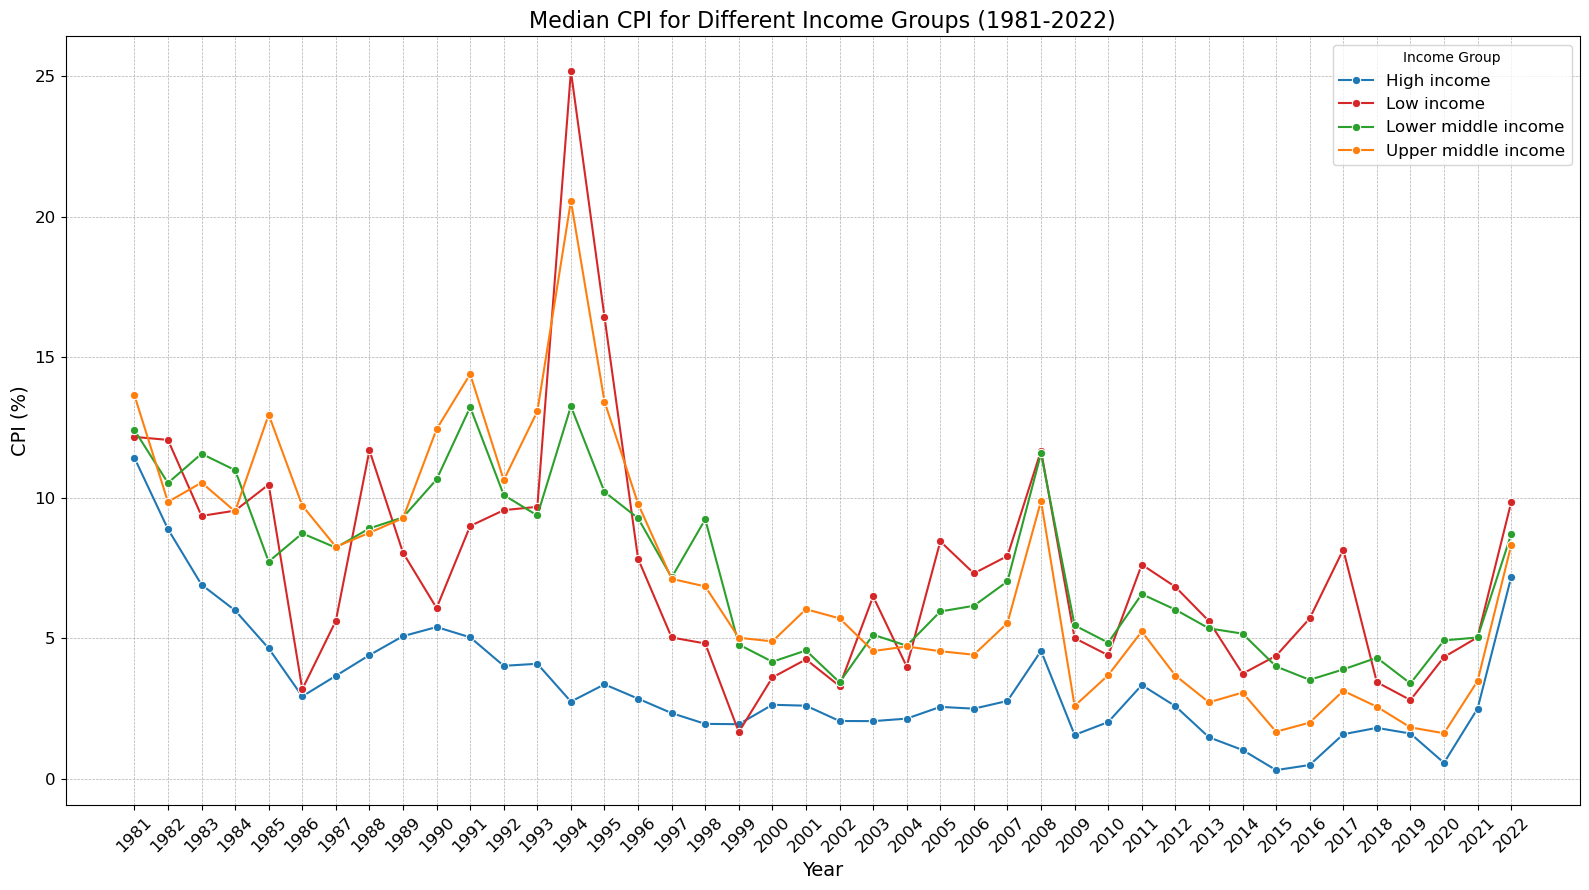

In [9]:
# Convert all numeric columns to float data type
df_countries_float = df_countries.drop(columns=['Country Code', 'Country Name', 'Region', 'IncomeGroup']).apply(pd.to_numeric, errors='coerce')

# Re-attach the non-numeric columns
df_countries_float['IncomeGroup'] = df_countries['IncomeGroup']

# Calculate the median CPI for each income group from 1981 to 2022
median_cpi_countries = df_countries_float.groupby('IncomeGroup').median().loc[:, '1981':'2022'].transpose()

# List of income groups
income_groups = median_cpi_countries.columns.tolist()

# Adjusting the color dictionary to match the income groups in the dataset
colors_adjusted = {
    'High income': '#1f77b4',
    'Upper middle income': '#ff7f0e',
    'Lower middle income': '#2ca02c',
    'Low income': '#d62728',
    'Not classified': '#9467bd'
}

# Plotting the median CPI for each income group with updated colors
plt.figure(figsize=(16, 9))
for group in income_groups:
    sns.lineplot(data=median_cpi_countries, x=median_cpi_countries.index, y=group, label=group, color=colors_adjusted[group], marker='o')

plt.title('Median CPI for Different Income Groups (1981-2022)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('CPI (%)', fontsize=14)
plt.legend(title='Income Group', fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

In [10]:
# Identify columns in the df_countries dataset that contain non-numeric data
non_numeric_columns = df_countries.applymap(np.isreal).all() == False

# Listing the columns that contain non-numeric data
problematic_columns = non_numeric_columns[non_numeric_columns].index.tolist()

# Drop problematic columns except 'IncomeGroup'
columns_to_drop = [col for col in problematic_columns if col != 'IncomeGroup']
df_cleaned = df_countries.drop(columns=columns_to_drop)

# Calculate the standard deviation (volatility) for each income group from 1981 to 2022
volatility = df_cleaned.groupby('IncomeGroup').std().loc[:, '1981':'2022'].mean(axis=1).reset_index()
volatility.columns = ['Income Group', 'Volatility']
df_volatility = volatility

# Desired order for the 'Income Group' column
desired_order = ['High income', 'Upper middle income', 'Lower middle income', 'Low income']

# Reorder the rows based on the desired order
df_volatility_ordered = df_volatility.set_index('Income Group').reindex(desired_order).reset_index()

# Reset the index
df_volatility_ordered = df_volatility_ordered.reset_index(drop=True)

df_volatility_ordered.to_excel('CPI_Volatility_by_Income_Groups.xlsx')

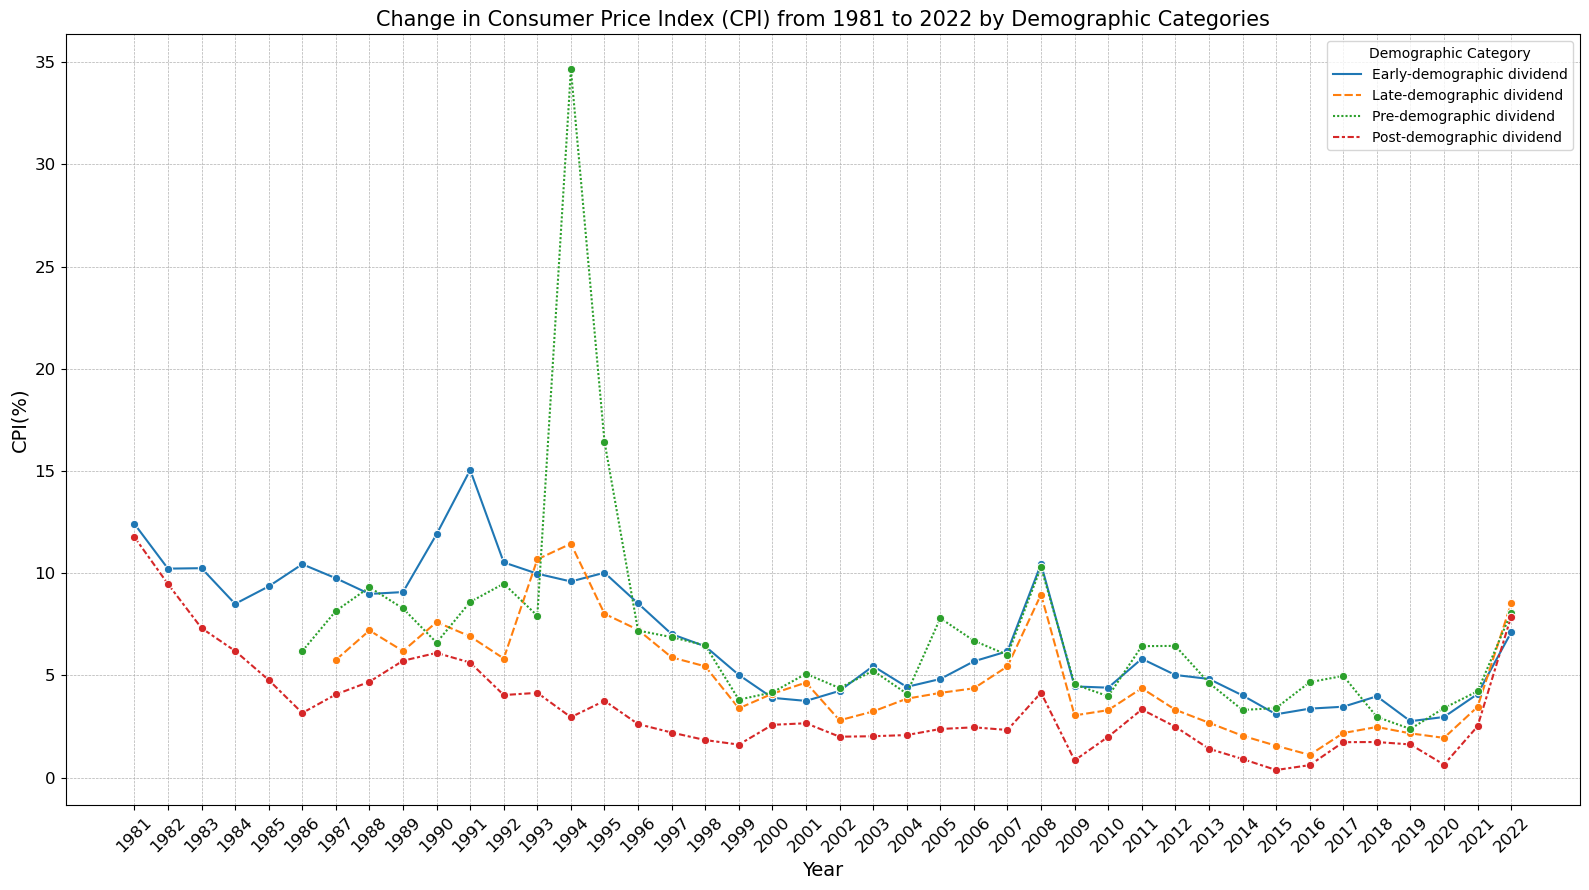

In [11]:
# Filter the df_countries_reloaded dataset for the specific 'Area Name' values from df_areas_reloaded
demographic_dividends = ['Early-demographic dividend', 'Late-demographic dividend', 'Pre-demographic dividend', 'Post-demographic dividend']

# Extracting the data for the demographic dividend categories from df_areas_reloaded for the years 1981 to 2022
filtered_areas_cpi = df_areas[df_areas['Area Name'].isin(demographic_dividends)].loc[:, '1981':'2022'].transpose()
filtered_areas_cpi.head()

# Renaming columns of filtered_areas_cpi dataframe
filtered_areas_cpi.columns = ['Early-demographic dividend', 'Late-demographic dividend', 'Pre-demographic dividend', 'Post-demographic dividend']


# Plotting the data
plt.figure(figsize=(16, 9))
sns.lineplot(data=filtered_areas_cpi, marker='o', linestyle='-')
plt.title("Change in Consumer Price Index (CPI) from 1981 to 2022 by Demographic Categories", fontsize=15)
plt.ylabel("CPI(%)", fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.legend(title="Demographic Category", fontsize=10)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

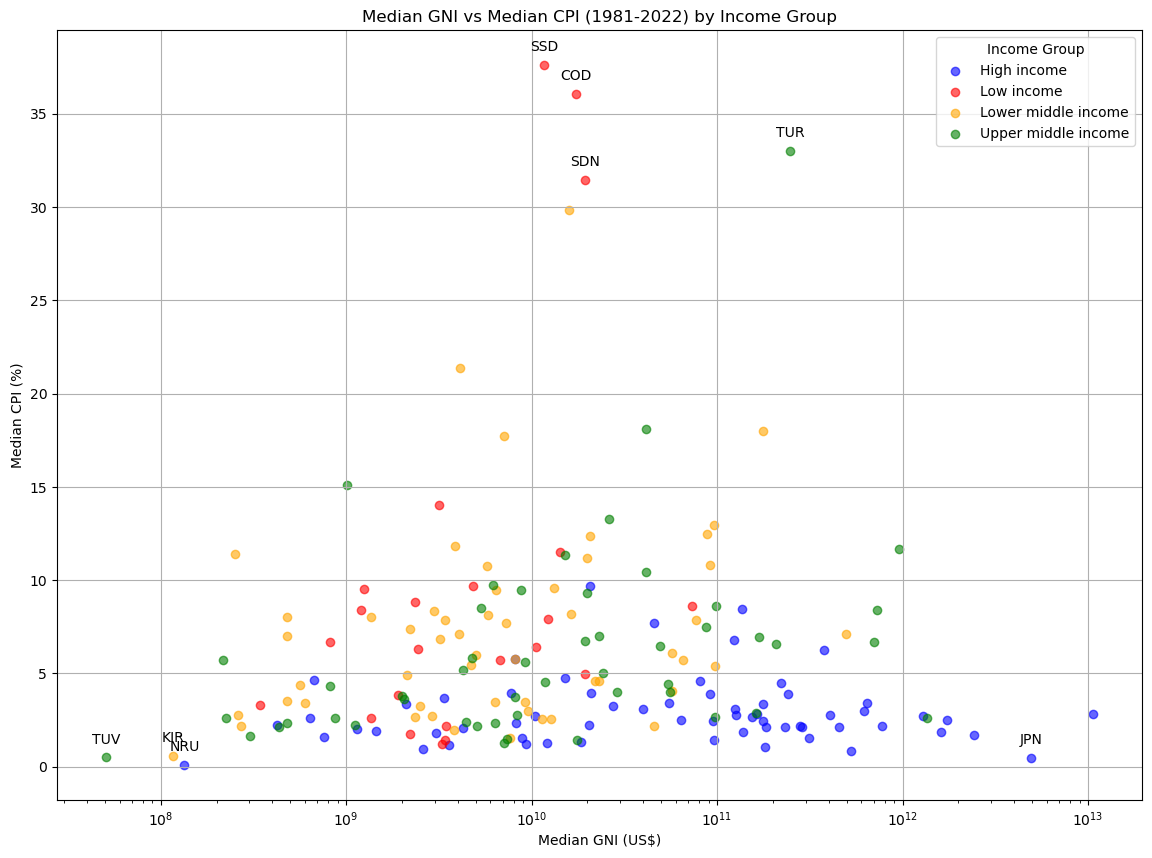

In [12]:
# Step 1: Filter df_gni to include only countries (non-empty 'IncomeGroup')
df_gni_countries = df_gni[df_gni['IncomeGroup'].notna()]

# Step 2: Calculate the median GNI for these countries from 1981 to 2022
median_gni_countries = df_gni_countries.loc[:, '1981':'2022'].median(axis=1)

# Step 3: Filter df_countries to match the country codes from df_gni
df_countries_matched = df_countries[df_countries['Country Code'].isin(df_gni_countries['Country Code'])]

# Step 4: Calculate the median CPI for these matched countries from 1981 to 2022
median_cpi_countries = df_countries_matched.loc[:, '1981':'2022'].median(axis=1)

# Step 5: Combine the median GNI and CPI into a single DataFrame
df_median_gni_cpi_countries = pd.DataFrame({
    'Country Code': df_gni_countries['Country Code'],
    'Median GNI': median_gni_countries,
    'Median CPI': median_cpi_countries
}).dropna().reset_index(drop=True)

# Add the 'IncomeGroup' to our existing df_median_gni_cpi_countries DataFrame
df_median_gni_cpi_countries = df_median_gni_cpi_countries.merge(
    df_countries[['Country Code', 'IncomeGroup']],
    on='Country Code',
    how='left'
)

# Define colors for each income group
colors = {
    'High income': 'blue',
    'Upper middle income': 'green',
    'Lower middle income': 'orange',
    'Low income': 'red'
}

# Calculate the 5th and 95th percentiles for CPI
low_cpi_threshold = df_median_gni_cpi_countries['Median CPI'].quantile(0.02)
high_cpi_threshold = df_median_gni_cpi_countries['Median CPI'].quantile(0.98)

# Get the top low CPI and top high CPI countries
top_low_cpi_countries = df_median_gni_cpi_countries[df_median_gni_cpi_countries['Median CPI'] <= low_cpi_threshold]
top_high_cpi_countries = df_median_gni_cpi_countries[df_median_gni_cpi_countries['Median CPI'] >= high_cpi_threshold]

# Create the improved scatter plot
plt.figure(figsize=(14, 10))

# Plot each income group with its corresponding color
for income_group, group_data in df_median_gni_cpi_countries.groupby('IncomeGroup'):
    plt.scatter(
        group_data['Median GNI'],
        group_data['Median CPI'],
        alpha=0.6,
        color=colors[income_group],
        label=income_group
    )

# Annotate country names for the top low/high CPI countries
for _, row in top_low_cpi_countries.iterrows():
    plt.annotate(
        row['Country Code'],
        (row['Median GNI'], row['Median CPI']),
        textcoords="offset points",  # how to position the text
        xytext=(0,10),  # distance from text to points (x,y)
        ha='center',  # horizontal alignment can be left, right or center
        fontsize=10,
        color='black'
    )

for _, row in top_high_cpi_countries.iterrows():
    plt.annotate(
        row['Country Code'],
        (row['Median GNI'], row['Median CPI']),
        textcoords="offset points",  # how to position the text
        xytext=(0,10),  # distance from text to points (x,y)
        ha='center',  # horizontal alignment can be left, right or center
        fontsize=10,
        color='black'
    )

# Title and labels
plt.title('Median GNI vs Median CPI (1981-2022) by Income Group')
plt.xlabel('Median GNI (US$)')
plt.ylabel('Median CPI (%)')
plt.xscale('log')  # Using a log scale for better visualization
plt.grid(True)
plt.legend(title='Income Group')
plt.show()

In [13]:
# Now calculate the CPI volatility (standard deviation) for the same years
cpi_volatility_countries = df_countries.loc[:, '1981':'2022'].std(axis=1)

# Step 3: Merge the average GNI and CPI volatility into a single DataFrame
# Note: We'll merge on 'Country Code' assuming it is a common key between the two dataframes
df_combined = pd.DataFrame({
    'Country Code': df_gni_countries['Country Code'],
    'Median GNI': median_gni_countries,
    'CPI Volatility': cpi_volatility_countries
})

# Merge with the income group from the original GNI dataframe for coloring the scatter plot
df_combined = df_combined.merge(df_gni_countries[['Country Code', 'IncomeGroup']], on='Country Code', how='left')

# Removing rows with any missing values
df_combined_cleaned = df_combined.dropna().reset_index(drop=True)

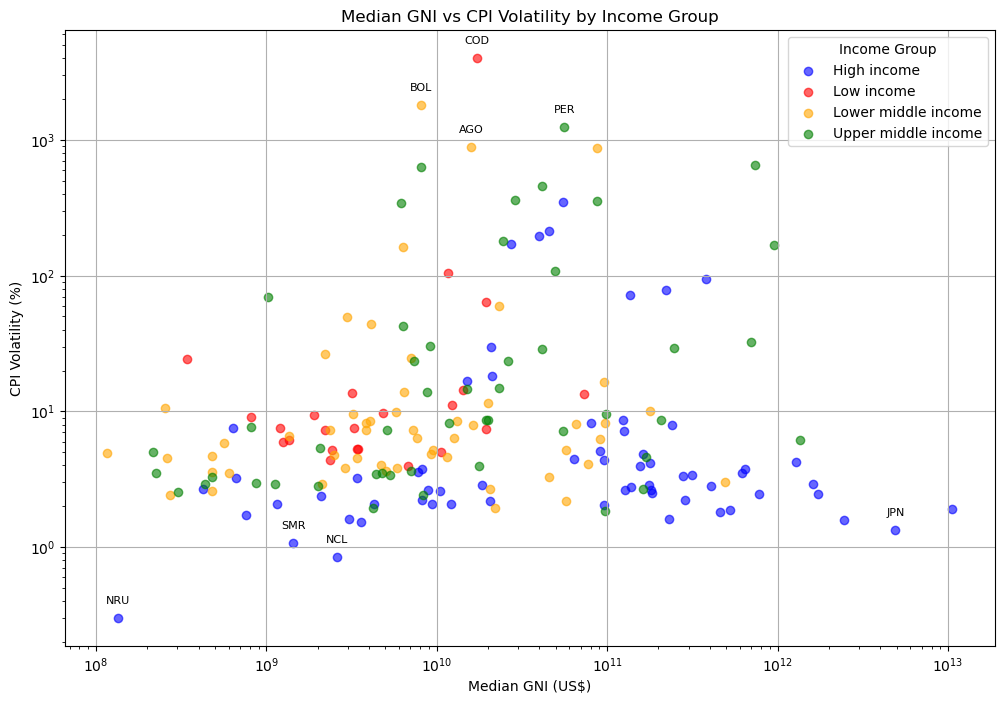

In [14]:
# Define colors for each income group
income_group_colors = {
    'Low income': 'red',
    'Lower middle income': 'orange',
    'Upper middle income': 'green',
    'High income': 'blue'
}

# Create a scatter plot
plt.figure(figsize=(12, 8))

# Calculate the 2nd and 98th percentiles for CPI Volatility
low_volatility_threshold = df_combined_cleaned['CPI Volatility'].quantile(0.02)
high_volatility_threshold = df_combined_cleaned['CPI Volatility'].quantile(0.98)

# Get the countries with top low and high CPI Volatility
top_low_volatility_countries = df_combined_cleaned[df_combined_cleaned['CPI Volatility'] <= low_volatility_threshold]
top_high_volatility_countries = df_combined_cleaned[df_combined_cleaned['CPI Volatility'] >= high_volatility_threshold]

# Group data by income group and plot each group with different colors
for income_group, group_data in df_combined_cleaned.groupby('IncomeGroup'):
    plt.scatter(
        group_data['Median GNI'], 
        group_data['CPI Volatility'], 
        color=income_group_colors[income_group], 
        alpha=0.6, 
        label=income_group
    )

# Annotate country names for the countries at the 2nd and 98th percentile
for _, row in top_low_volatility_countries.iterrows():
    plt.annotate(
        row['Country Code'],
        (row['Median GNI'], row['CPI Volatility']),
        textcoords="offset points",
        xytext=(0,10),
        ha='center',
        fontsize=8
    )

for _, row in top_high_volatility_countries.iterrows():
    plt.annotate(
        row['Country Code'],
        (row['Median GNI'], row['CPI Volatility']),
        textcoords="offset points",
        xytext=(0,10),
        ha='center',
        fontsize=8
    )

# Add a legend, title, and labels
plt.legend(title='Income Group')
plt.title('Median GNI vs CPI Volatility by Income Group')
plt.xlabel('Median GNI (US$)')
plt.ylabel('CPI Volatility (%)')
plt.xscale('log')  # Log scale for GNI for better visibility
plt.yscale('log')  # Log scale for CPI Volatility for better visibility
plt.grid(True)
plt.show()